# Predict SP500
## This project develops a machine learning model to predict if the price of the stock is going to go up or down the next day

### Import, Clean and Prepare Data

In [1]:
import yfinance as yf

In [3]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")

In [7]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,0.0,0.0
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,0.0,0.0
2025-03-27 00:00:00-04:00,5695.640137,5732.279785,5670.939941,5693.310059,4403460000,0.0,0.0


In [9]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-03-18 00:00:00-04:00', '2025-03-19 00:00:00-04:00',
               '2025-03-20 00:00:00-04:00', '2025-03-21 00:00:00-04:00',
               '2025-03-24 00:00:00-04:00', '2025-03-25 00:00:00-04:00',
               '2025-03-26 00:00:00-04:00', '2025-03-27 00:00:00-04:00',
               '2025-03-28 00:00:00-04:00', '2025-03-31 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24427, freq=None)

<Axes: xlabel='Date'>

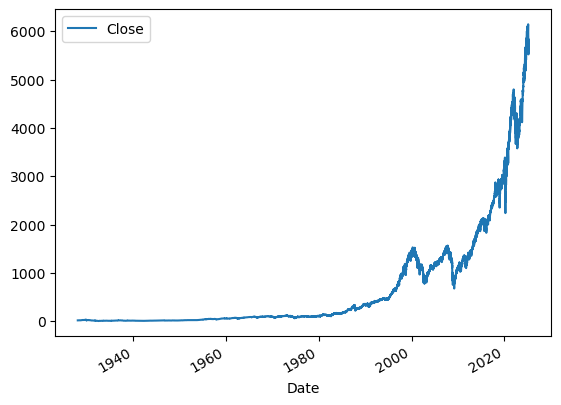

In [11]:
sp500.plot.line(y="Close", use_index="True")

In [13]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [15]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,5712.200195
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,5693.310059
2025-03-27 00:00:00-04:00,5695.640137,5732.279785,5670.939941,5693.310059,4403460000,5580.939941


In [19]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,5712.200195,0
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,5693.310059,0
2025-03-27 00:00:00-04:00,5695.640137,5732.279785,5670.939941,5693.310059,4403460000,5580.939941,0


In [23]:
sp500 = sp500.loc["1990-01-01":].copy()

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,5712.200195,0
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,5693.310059,0
2025-03-27 00:00:00-04:00,5695.640137,5732.279785,5670.939941,5693.310059,4403460000,5580.939941,0


### Initial Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])



RandomForestClassifier(min_samples_split=100, random_state=1)

In [29]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [31]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [33]:
precision_score(test["Target"], preds)

0.6666666666666666

<Axes: xlabel='Date'>

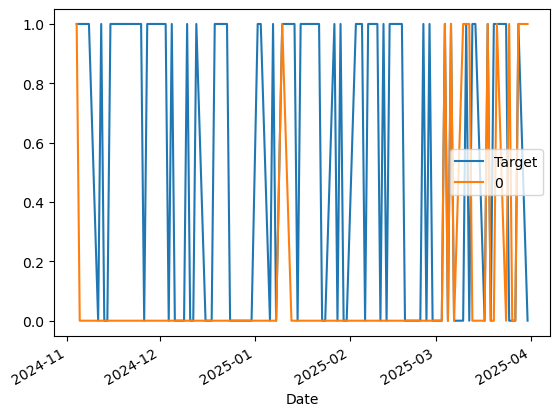

In [35]:
combined = pd.concat([test["Target"], preds], axis=1)

combined.plot()

### Incremented backtest

In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [40]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [42]:
predictions = backtest(sp500, model, predictors)

In [44]:
predictions["Predictions"].value_counts()

Predictions
0    3735
1    2642
Name: count, dtype: int64

In [46]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5287660862982589

In [48]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535832
0    0.464168
Name: count, dtype: float64

### Improved Model with Extra Prediction Columns

In [52]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
 
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [56]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,0.993731,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,5712.200195,0,1.000787,1.011674,0.976644,1.024107,1.245035,2.0,4.0,31.0,142.0,529.0
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,5693.310059,0,0.994390,0.999095,0.966634,1.012316,1.230695,1.0,3.0,31.0,142.0,528.0
2025-03-27 00:00:00-04:00,5695.640137,5732.279785,5670.939941,5693.310059,4403460000,5580.939941,0,0.998344,0.994733,0.964192,1.008650,1.226198,0.0,3.0,31.0,141.0,527.0


In [58]:
sp500 = sp500.dropna()

In [60]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,0.996617,1.000283,1.028047,1.176082,1.0,1.0,32.0,127.0,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.995899,0.997329,1.025151,1.172676,0.0,1.0,32.0,126.0,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,0.999495,1.000311,1.028274,1.176163,1.0,2.0,32.0,127.0,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,1.004991,1.006561,1.034781,1.183537,2.0,3.0,32.0,128.0,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.003784,1.005120,1.033359,1.181856,1.0,2.0,32.0,128.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24 00:00:00-04:00,5718.080078,5775.140137,5718.080078,5767.569824,4517990000,5776.649902,1,1.008746,1.015848,0.974386,1.022902,1.243561,2.0,3.0,31.0,141.0,529.0
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,5712.200195,0,1.000787,1.011674,0.976644,1.024107,1.245035,2.0,4.0,31.0,142.0,529.0
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,5693.310059,0,0.994390,0.999095,0.966634,1.012316,1.230695,1.0,3.0,31.0,142.0,528.0


In [62]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [64]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [66]:
predictions = backtest(sp500, model, new_predictors)

In [68]:
predictions["Predictions"].value_counts()

Predictions
0.0    4509
1.0     867
Name: count, dtype: int64

In [70]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5743944636678201